### TensorFlow 2.x MNIST Classification with DNN (Only Dense Layers)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [56]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28*28))/255.0
test_images = test_images.reshape((10000, 28*28))/255.0

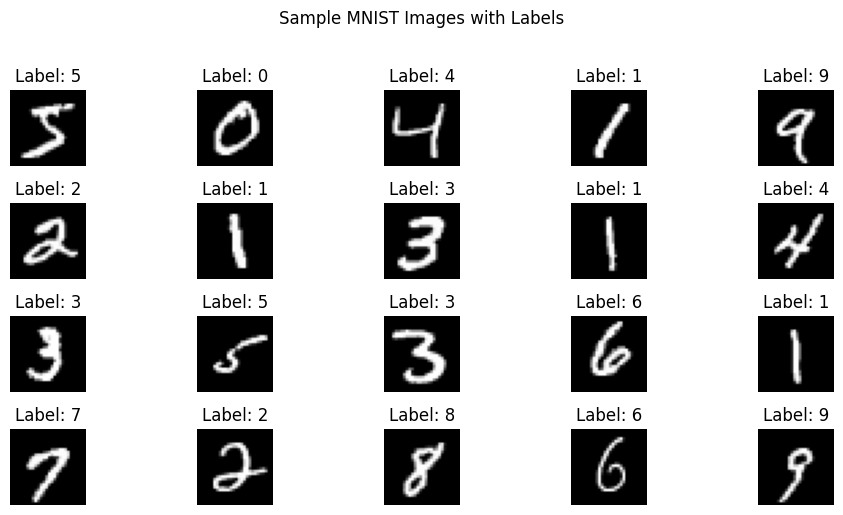

In [57]:
plt.figure(figsize=(10,5))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(train_images[i].reshape(28,28),cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.suptitle('Sample MNIST Images with Labels',y=1.02)
plt.tight_layout()
plt.show()

In [128]:
model = models.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(28*28,)),
    layers.Dropout(0.3),
    layers.Dense(128, activation='sigmoid'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_loss',    # Watch validation loss
    patience=3,            # Stop if no improvement for 3 epochs
    restore_best_weights=True  # Restore weights from the best epoch
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',    # Watch validation loss
    factor=0.5,            # Reduce LR by half
    patience=2,            # After 2 epochs of no improvement
    min_lr=1e-6,           # Do not go below this learning rate
    verbose=1
)


In [130]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [131]:
history = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=35,
    validation_data=(test_images, test_labels),
    callbacks=[early_stop, lr_scheduler]
)


Epoch 1/20
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8632 - loss: 0.4649 - val_accuracy: 0.9680 - val_loss: 0.1032 - learning_rate: 0.0010
Epoch 2/20
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9655 - loss: 0.1153 - val_accuracy: 0.9736 - val_loss: 0.0834 - learning_rate: 0.0010
Epoch 3/20
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9765 - loss: 0.0789 - val_accuracy: 0.9775 - val_loss: 0.0735 - learning_rate: 0.0010
Epoch 4/20
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9805 - loss: 0.0629 - val_accuracy: 0.9794 - val_loss: 0.0624 - learning_rate: 0.0010
Epoch 5/20
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9843 - loss: 0.0514 - val_accuracy: 0.9794 - val_loss: 0.0681 - learning_rate: 0.0010
Epoch 6/20
1710/1715 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9848 - loss: 0.0474
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9848 - lo

In [132]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9823 - loss: 0.0619

Test Accuracy: 0.9861


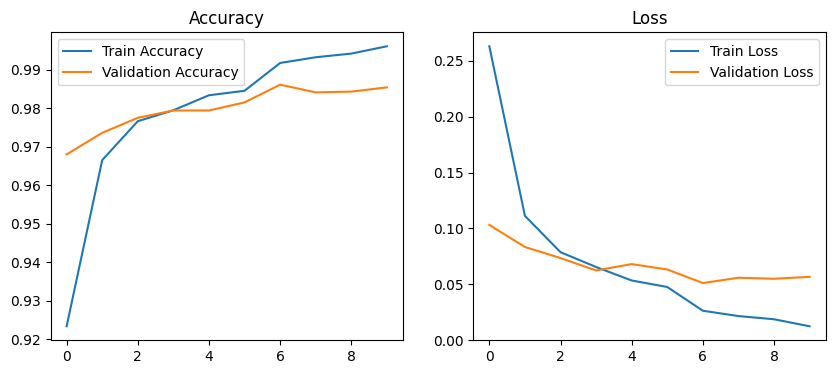

In [133]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy")
plt.legend()

# plt.figure(figsize=(10,4))
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss")
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step


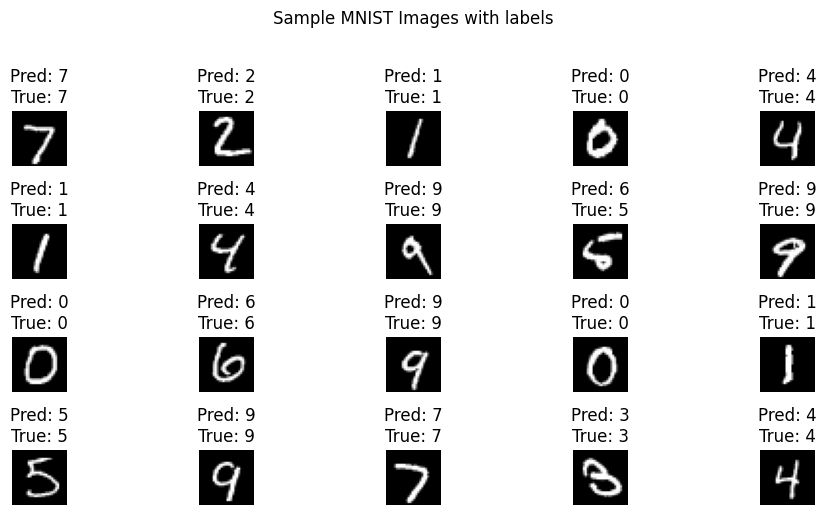

In [134]:
predictions = model.predict(test_images)
predicted_labels = predictions.argmax(axis=1) 

plt.figure(figsize = (10, 5))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap = 'gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {test_labels[i]}")
    plt.axis('off')

plt.suptitle('Sample MNIST Images with labels', y = 1.02)
plt.tight_layout()
plt.show()